# LSTM과 GRU 셀

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hg-mldl2/blob/main/09-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import keras
import tensorflow as tf

keras.utils.set_random_seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()

## LSTM 신경망 훈련하기

In [2]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [3]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                         validation_data=(val_seq, val_target),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6052 - loss: 0.6481 - val_accuracy: 0.7632 - val_loss: 0.4902
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7781 - loss: 0.4808 - val_accuracy: 0.7874 - val_loss: 0.4556
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7947 - loss: 0.4495 - val_accuracy: 0.7922 - val_loss: 0.4437
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8008 - loss: 0.4342 - val_accuracy: 0.7940 - val_loss: 0.4417
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8036 - loss: 0.4251 - val_accuracy: 0.7964 - val_loss: 0.4382
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8085 - loss: 0.4170 - val_accuracy: 0.7986 - val_loss: 0.4358
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8113 - loss: 0.4104 - val_accuracy: 0.7998 - val_loss: 0.4331
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8120 - loss: 0.4053 - val_a

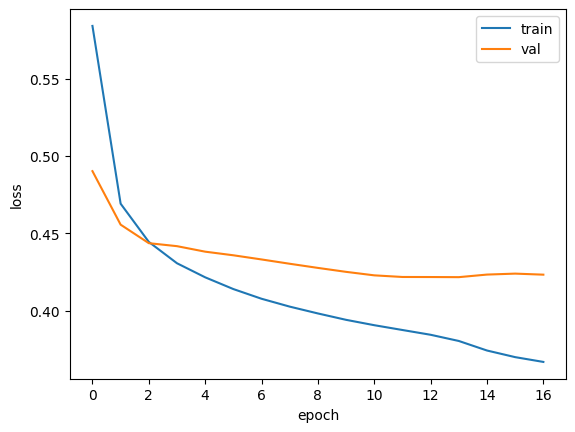

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 순환 층에 드롭아웃 적용하기

In [7]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64,
                            validation_data=(val_seq, val_target),
                            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5852 - loss: 0.6662 - val_accuracy: 0.7528 - val_loss: 0.5231
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7606 - loss: 0.5058 - val_accuracy: 0.7748 - val_loss: 0.4804
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7853 - loss: 0.4649 - val_accuracy: 0.7868 - val_loss: 0.4625
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7969 - loss: 0.4437 - val_accuracy: 0.7960 - val_loss: 0.4436
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7988 - loss: 0.4294 - val_accuracy: 0.7970 - val_loss: 0.4413
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8047 - loss: 0.4210 - val_accuracy: 0.8002 - val_loss: 0.4366
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8100 - loss: 0.4147 - val_accuracy: 0.7934 - val_loss: 0.4471
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8107 - loss: 0.4132 - val_acc

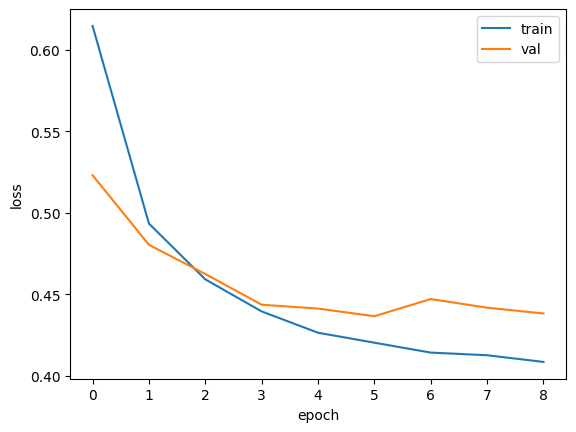

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 2개의 층을 연결하기

In [10]:
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6153 - loss: 0.6340 - val_accuracy: 0.7670 - val_loss: 0.4913
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7712 - loss: 0.4857 - val_accuracy: 0.7862 - val_loss: 0.4619
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7864 - loss: 0.4614 - val_accuracy: 0.7832 - val_loss: 0.4602
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7973 - loss: 0.4471 - val_accuracy: 0.7882 - val_loss: 0.4556
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7998 - loss: 0.4405 - val_accuracy: 0.7902 - val_loss: 0.4525
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8022 - loss: 0.4313 - val_accuracy: 0.7868 - val_loss: 0.4622
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8060 - loss: 0.4291 - val_accuracy: 0.7982 - val_loss: 0.4457
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8114 - loss: 0.4183 - 

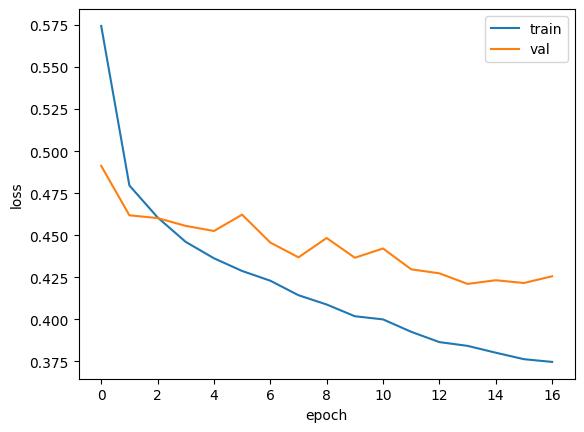

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## GRU 신경망 훈련하기

In [13]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64,
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5616 - loss: 0.6737 - val_accuracy: 0.7552 - val_loss: 0.5116
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7562 - loss: 0.5036 - val_accuracy: 0.7536 - val_loss: 0.5063
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7815 - loss: 0.4700 - val_accuracy: 0.7778 - val_loss: 0.4677
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7939 - loss: 0.4477 - val_accuracy: 0.7880 - val_loss: 0.4506
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8002 - loss: 0.4342 - val_accuracy: 0.7906 - val_loss: 0.4492
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8050 - loss: 0.4260 - val_accuracy: 0.7992 - val_loss: 0.4349
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8074 - loss: 0.4215 - val_accuracy: 0.7988 - val_loss: 0.4350
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8102 - loss: 0.4183 - val_acc

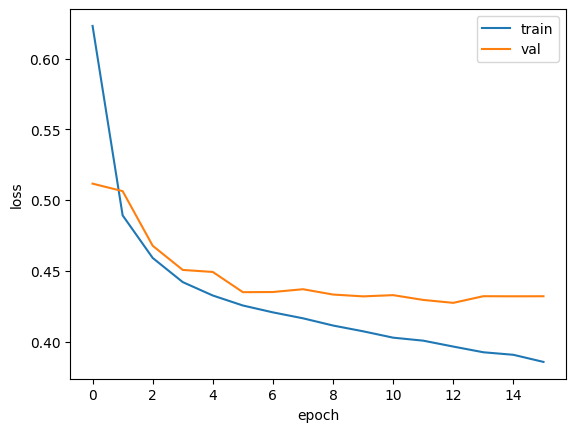

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 마무리

In [16]:
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8082 - loss: 0.4215


[0.4206896126270294, 0.8072400093078613]